# Pathway Enrichment Analysis 
Using KEGG analysis to explore enriched pathways from DMGs identified in pairwise comparisons with HC (hypoxic control) 

#### load and prep data frames

In [130]:
# loading libraries
library(topGO)
library(KEGGREST)
library(dplyr)
library(clusterProfiler)
library(ggridges)
library(ggplot2)
library(httr)

In [3]:
# importing csv files

#1 control control vs. hypoxic control
CC_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HC.csv')

#2 control hypoxic vs. hypoxic control
CH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CH_vs_HC.csv')

#3 hypoxic hypoxic vs. hypoxic control
HH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/HH_vs_HC.csv')


## control control vs. hypoxic control
CC vs. HC

In [4]:
head(CC_HC)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111120752,0.3456118,-0.04195790,0.2300421,0,1,NA
2,LOC111109452,1.5973302,-0.09288309,0.2529871,0,1,NA
3,LOC111124802,213.0013054,0.06672759,0.1192547,0,1,1
4,LOC111101273,76.7130208,-0.20267259,0.1576994,0,1,1
5,LOC111101250,123.4748149,-0.13501125,0.1799700,0,1,1
6,LOC111101262,269.4443993,0.14318006,0.1234759,0,1,1


formatting the df as needed to run KEGG

In [5]:
# selecting columns I need
cc_hc <- select(CC_HC, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
cc_hc$X <- substr(cc_hc$X, start = 4, stop = nchar(cc_hc$X))

# renaming columns
colnames(cc_hc) <- c('gene', 'lfc', 'padj')

head(cc_hc)

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
1,111120752,-0.04195790,NA
2,111109452,-0.09288309,NA
3,111124802,0.06672759,1
4,111101273,-0.20267259,1
5,111101250,-0.13501125,1
6,111101262,0.14318006,1


In [6]:
# creating numeric vector for kegg object
CC_kegg_gene_list <- cc_hc$lfc
names(CC_kegg_gene_list) <- cc_hc$gene

# omitting anything with NA in a cell
CC_kegg_gene_list <- na.omit(CC_kegg_gene_list)

# sort list in descending order
CC_kegg_gene_list = sort(CC_kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(CC_kegg_gene_list)
class(CC_kegg_gene_list)

111129122 111100699 111130929 111129146 111136327 111130870 
 1.893684  1.429007  1.418989  1.395451  1.394858  1.381530

[1] "numeric"

now that my gene list looks okay - running KEGG

In [7]:
kegg_organism = 'cvn'
CC_kk2 <- gseKEGG(geneList = CC_kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

Reading KEGG annotation online: "https://rest.kegg.jp/link/cvn/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/cvn"...

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [10]:
CC_kk2_df <- as.data.frame(CC_kk2)
CC_kk2_df$Description <- sub(" -.*", "", CC_kk2_df$Description)
head(CC_kk2_df)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,11,0.7847989,1.980242,0.0005798551,0.07074233,0.07019299,1855,"tags=73%, list=14%, signal=63%",111113990/111115744/111127642/111136066/111123661/111107112/111115745/111136438
cvn00310,cvn00310,Lysine degradation,31,-0.5216369,-1.579220,0.0125270455,0.66371146,0.65855754,1860,"tags=32%, list=14%, signal=28%",111130627/111109254/111115614/111130119/111121380/111125659/111107127/111110608/111112920/111128625
cvn00591,cvn00591,Linoleic acid metabolism,11,0.6158160,1.553857,0.0342321447,0.66371146,0.65855754,3475,"tags=55%, list=26%, signal=41%",111127642/111123661/111127589/111127588/111121119/111111230
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,18,0.5444173,1.549269,0.0345683297,0.66371146,0.65855754,2069,"tags=44%, list=15%, signal=38%",111113990/111115744/111129730/111136066/111107112/111115745/111136438/111131209
cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,57,-0.4211890,-1.421319,0.0358166189,0.66371146,0.65855754,3013,"tags=39%, list=22%, signal=30%",111103436/111122686/111102690/111134591/111123620/111119396/111128896/111123381/111112561/111102803/111105066/111110086/111119458/111125104/111128153/111121480/111132055/111119695/111128265/111120056/111128132/111133163
cvn04068,cvn04068,FoxO signaling pathway,66,-0.4086433,-1.410737,0.0380818054,0.66371146,0.65855754,2298,"tags=38%, list=17%, signal=32%",111128693/111125223/111121739/111121135/111134642/111118834/111131500/111112841/111126185/111103474/111119108/111130138/111105462/111121839/111107163/111120632/111113171/111134713/111102390/111119905/111121740/111120947/111112940/111128744/111104196


the code below takes a long time to run - should only be run once, then have the resulting df saved into a csv to just call back for analysis afterwords

generated with help of ChatGPT
Function to get pathway names
```get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}
```
generated with help of ChatGPT
```
gseKEGG_df <- select(CC_kk2_df, ID, Description, enrichmentScore, p.adj)
```
Function to apply to each KEGG ID in the dataframe
```
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)
```
Combine pathway info into a dataframe
```
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')
```
Combine pathway info with original dataframe
```
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)
```
Print the dataframe
```
head(as.data.frame(gseKEGG_df))
df <- as.data.frame(gseKEGG_df)
```
cleaning up GeneralPathway column to only include the pathway name and not CLASS
```
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column
```
also changing DetailedPathway into character instead of list to be able to write csv
```
df$DetailedPathway <- as.character(df$DetailedPathway)
head(df)
```

In [106]:
gseKEGG_df <- select(CC_kk2_df, ID, Description, enrichmentScore, p.adjust)

pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)

pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')

gseKEGG_df <- cbind(gseKEGG_df, pathway_df)

head(as.data.frame(gseKEGG_df))
df <- as.data.frame(gseKEGG_df)

column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column

df$DetailedPathway <- as.character(df$DetailedPathway)
head(df)


,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway
,<chr>,<chr>,<dbl>,<dbl>,<list>,<list>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.7847989,0.07074233,CLASS ....,Lipid me....
cvn00310,cvn00310,Lysine degradation,-0.5216369,0.66371146,CLASS ....,Amino ac....
cvn00591,cvn00591,Linoleic acid metabolism,0.6158160,0.66371146,CLASS ....,Lipid me....
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5444173,0.66371146,CLASS ....,Lipid me....
cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,-0.4211890,0.66371146,CLASS ....,Translation
cvn04068,cvn04068,FoxO signaling pathway,-0.4086433,0.66371146,CLASS ....,Signal t....


,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.7847989,0.07074233,Metabolism,Lipid metabolism
cvn00310,cvn00310,Lysine degradation,-0.5216369,0.66371146,Metabolism,Amino acid metabolism
cvn00591,cvn00591,Linoleic acid metabolism,0.6158160,0.66371146,Metabolism,Lipid metabolism
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5444173,0.66371146,Metabolism,Lipid metabolism
cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,-0.4211890,0.66371146,Genetic Information Processing,Translation
cvn04068,cvn04068,FoxO signaling pathway,-0.4086433,0.66371146,Environmental Information Processing,Signal transduction


In [107]:
CC_df <- df
head(CC_df)
write.csv(CC_df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/KEGG_CC_HC.csv')

,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.7847989,0.07074233,Metabolism,Lipid metabolism
cvn00310,cvn00310,Lysine degradation,-0.5216369,0.66371146,Metabolism,Amino acid metabolism
cvn00591,cvn00591,Linoleic acid metabolism,0.6158160,0.66371146,Metabolism,Lipid metabolism
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5444173,0.66371146,Metabolism,Lipid metabolism
cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,-0.4211890,0.66371146,Genetic Information Processing,Translation
cvn04068,cvn04068,FoxO signaling pathway,-0.4086433,0.66371146,Environmental Information Processing,Signal transduction


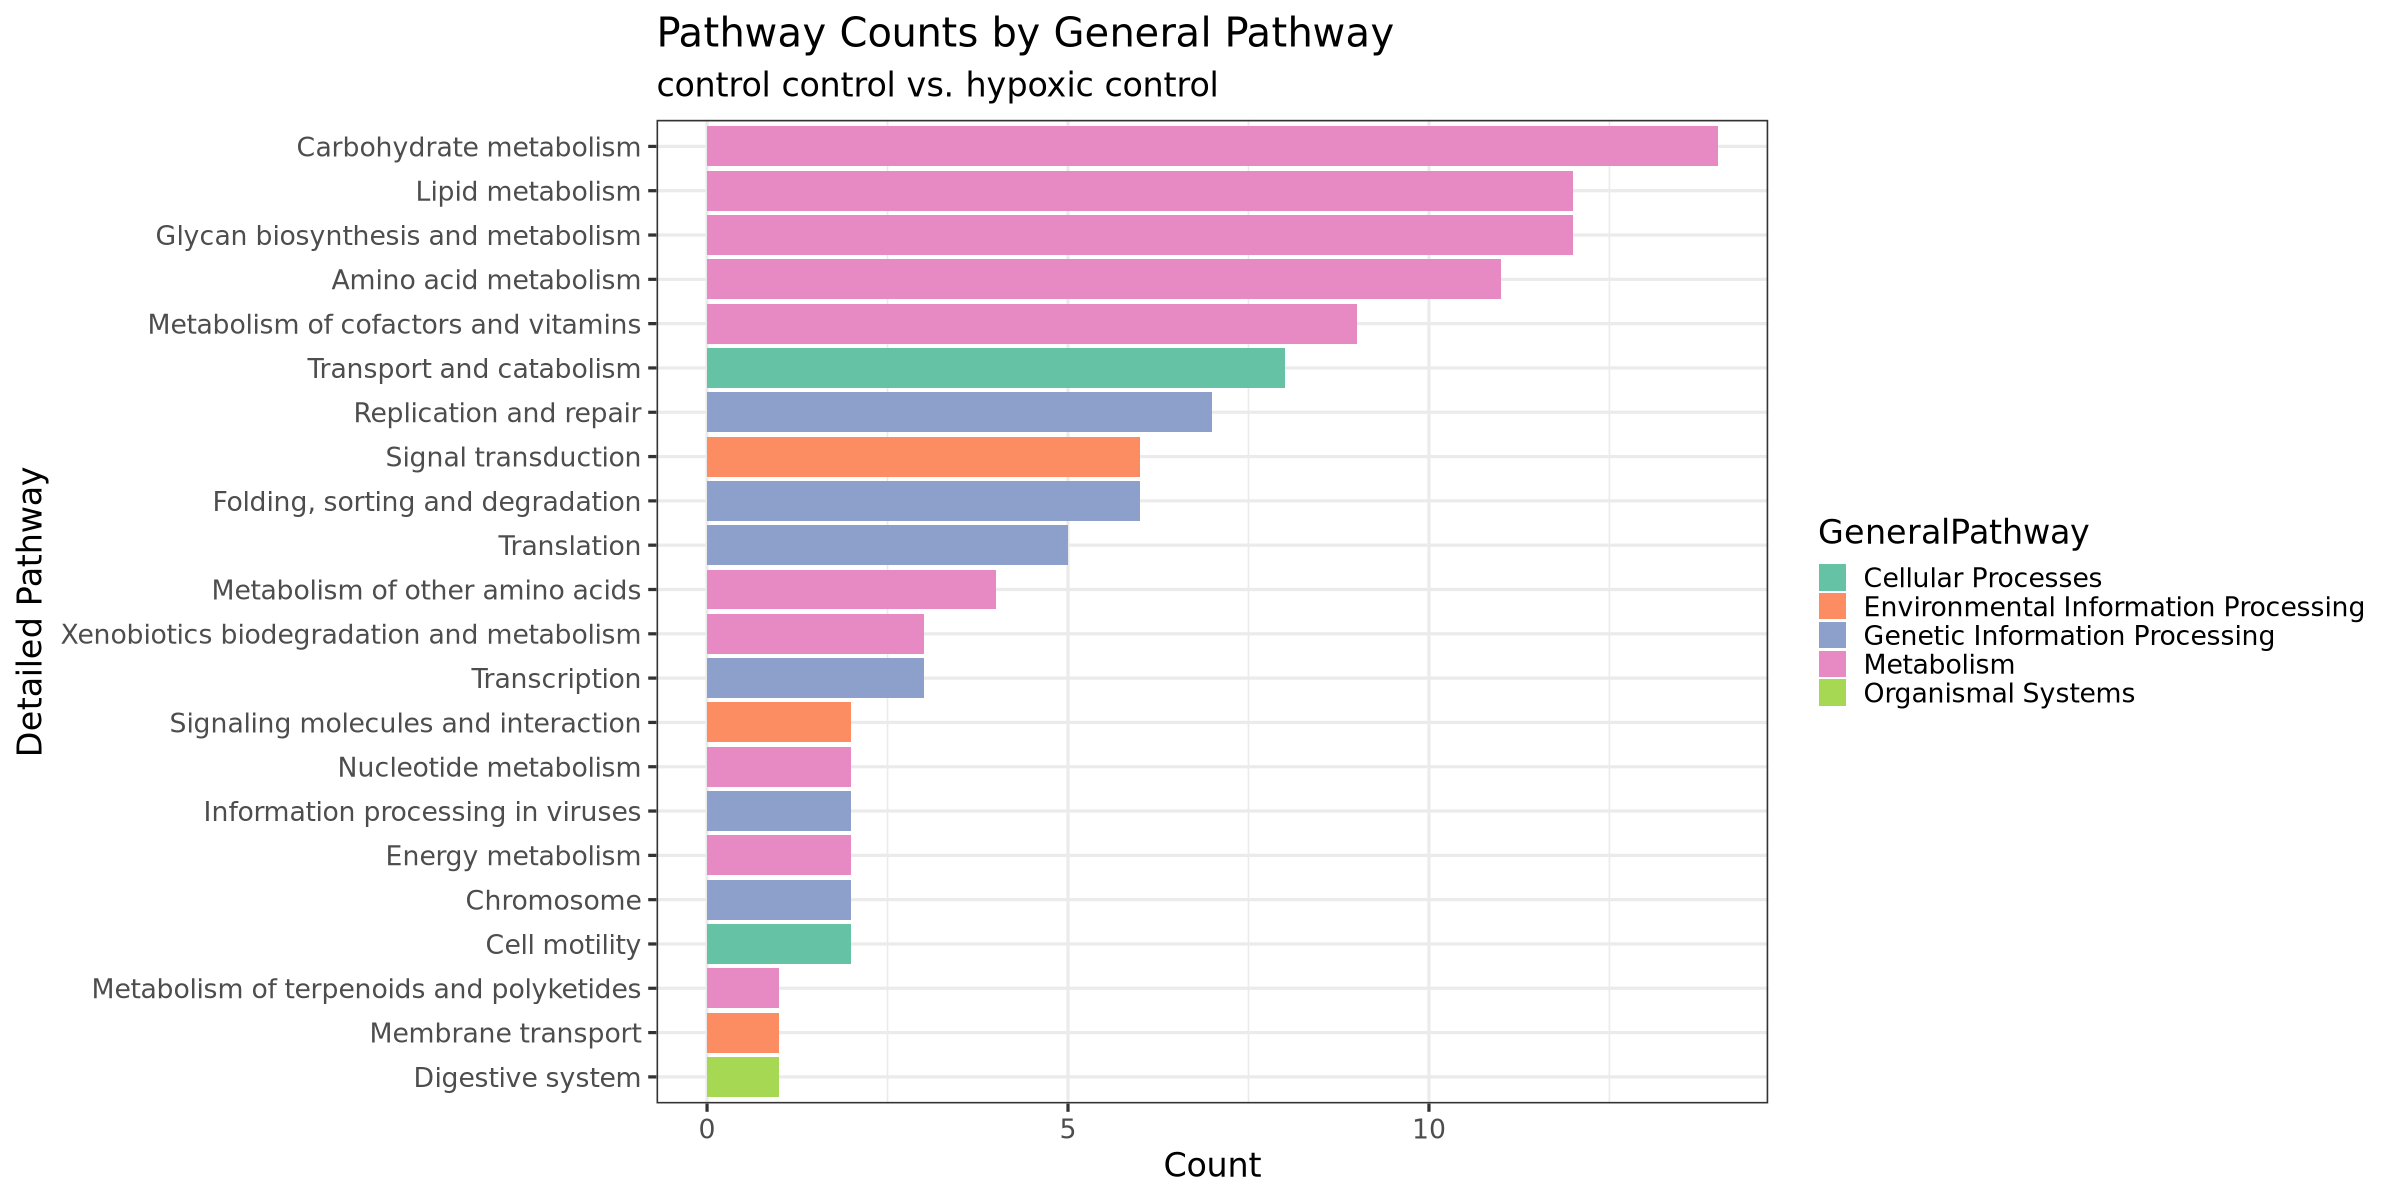

In [34]:
options(repr.plot.width=20, repr.plot.height=10)

# Filter out rows where GeneralPathway is NA
CC_df <- filter(CC_df, !is.na(GeneralPathway))

# Compute counts for each DetailedPathway
CC_counts <- CC_df %>%
  group_by(DetailedPathway, GeneralPathway) %>%
  summarise(count = n(), .groups = 'drop') %>%
  arrange(count)  # Sort by count

# Create the plot
ggplot(data = CC_counts, aes(x = reorder(DetailedPathway, count), 
                             y = count, 
                             fill = GeneralPathway)) +
  geom_bar(stat = "identity") +  # Use stat = "identity" since we have pre-computed counts
  coord_flip() +
  theme_bw(base_size= 20) + 
  scale_fill_brewer(palette = 'Set2') +
  labs(x = "Detailed Pathway", 
       y = "Count", 
       title = "Pathway Counts by General Pathway",
       subtitle = "control control vs. hypoxic control")


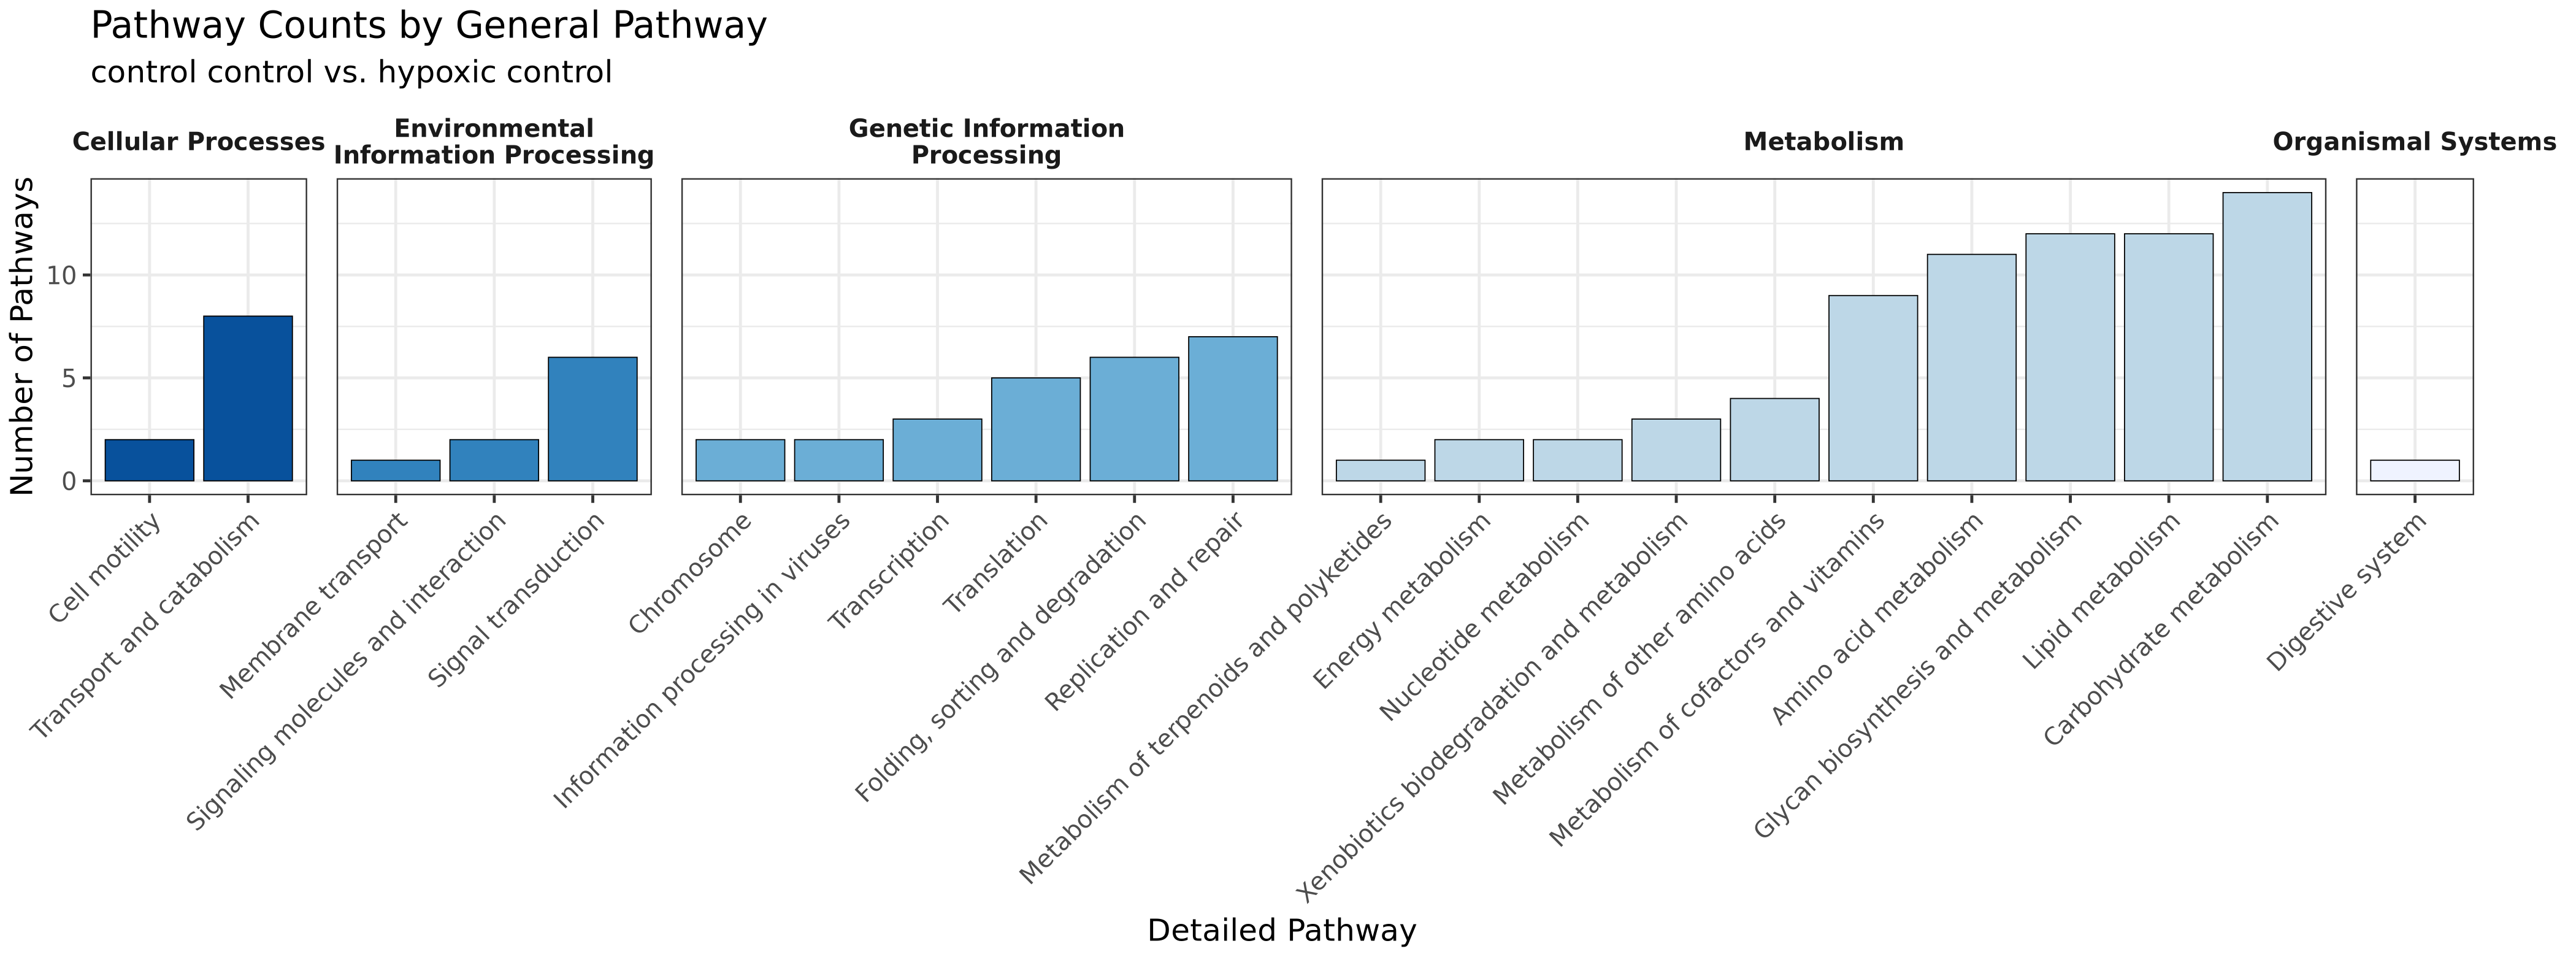

In [101]:
options(repr.plot.width=35, repr.plot.height=13)

# Filter out rows where GeneralPathway is NA
CC_df <- filter(CC_df, !is.na(GeneralPathway))

# Compute counts for each DetailedPathway
CC_counts <- CC_df %>%
  group_by(DetailedPathway, GeneralPathway) %>%
  summarise(count = n(), .groups = 'drop') %>%
  arrange(count)  # Sort by count

# Create the plot
ggplot(data = CC_counts, aes(x = reorder(DetailedPathway, count), 
                             y = count, 
                             fill = GeneralPathway, 
                             col = 'black')) +
  geom_bar(stat = "identity",
          show.legend=FALSE) +  # Use stat = "identity" since we have pre-computed counts
  #coord_flip() +
facet_grid(~GeneralPathway, 
           scales = "free_x", # deletes unused x axis labels
          space = "free",
          labeller = label_wrap_gen(multi_line = TRUE)) + # keeps bars the same width
  theme_bw(base_size= 30)+ 
scale_fill_brewer(palette = 'Blues', direction=-1) +
scale_color_manual(values = c('black','black','black','black','black')) +
theme(axis.text.x = element_text(angle = 45, hjust = 1),
     strip.clip = "off", # allows grid labels to have overlap
      strip.text = element_text(face = 'bold'), 
      panel.spacing = unit(2, "lines"), # adds space between panels
      plot.margin = margin(10,100,10,10), # adds space around plot (top, right, bottom, left)
     #strip.text.x = element_text(size=25),
     strip.background = element_rect(fill = "transparent", # removes background from grid labels
                                     color = NA )) + # removes grid border
  labs(x = "Detailed Pathway", 
       y = "Number of Pathways", 
       title = "Pathway Counts by General Pathway",
       subtitle = "control control vs. hypoxic control",
      fill = "General Pathway")


**what are the top 10 most significantly enriched pathways?**

I'm choosing to look at this by pulling out the pathways with the top 10 lowest adjust p-values (but maybe this would be better to do with p-value, q-value, or enrichmentScore?)

,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.7847989,0.07074233,Metabolism,Lipid metabolism
cvn00310,cvn00310,Lysine degradation,-0.5216369,0.66371146,Metabolism,Amino acid metabolism
cvn00591,cvn00591,Linoleic acid metabolism,0.6158160,0.66371146,Metabolism,Lipid metabolism
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5444173,0.66371146,Metabolism,Lipid metabolism
cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,-0.4211890,0.66371146,Genetic Information Processing,Translation
cvn04068,cvn04068,FoxO signaling pathway,-0.4086433,0.66371146,Environmental Information Processing,Signal transduction
cvn04146,cvn04146,Peroxisome,0.3366598,0.66371146,Cellular Processes,Transport and catabolism
cvn00270,cvn00270,Cysteine and methionine metabolism,-0.4343565,0.70819698,Metabolism,Amino acid metabolism
cvn00500,cvn00500,Starch and sucrose metabolism,-0.5121460,0.70819698,Metabolism,Carbohydrate metabolism


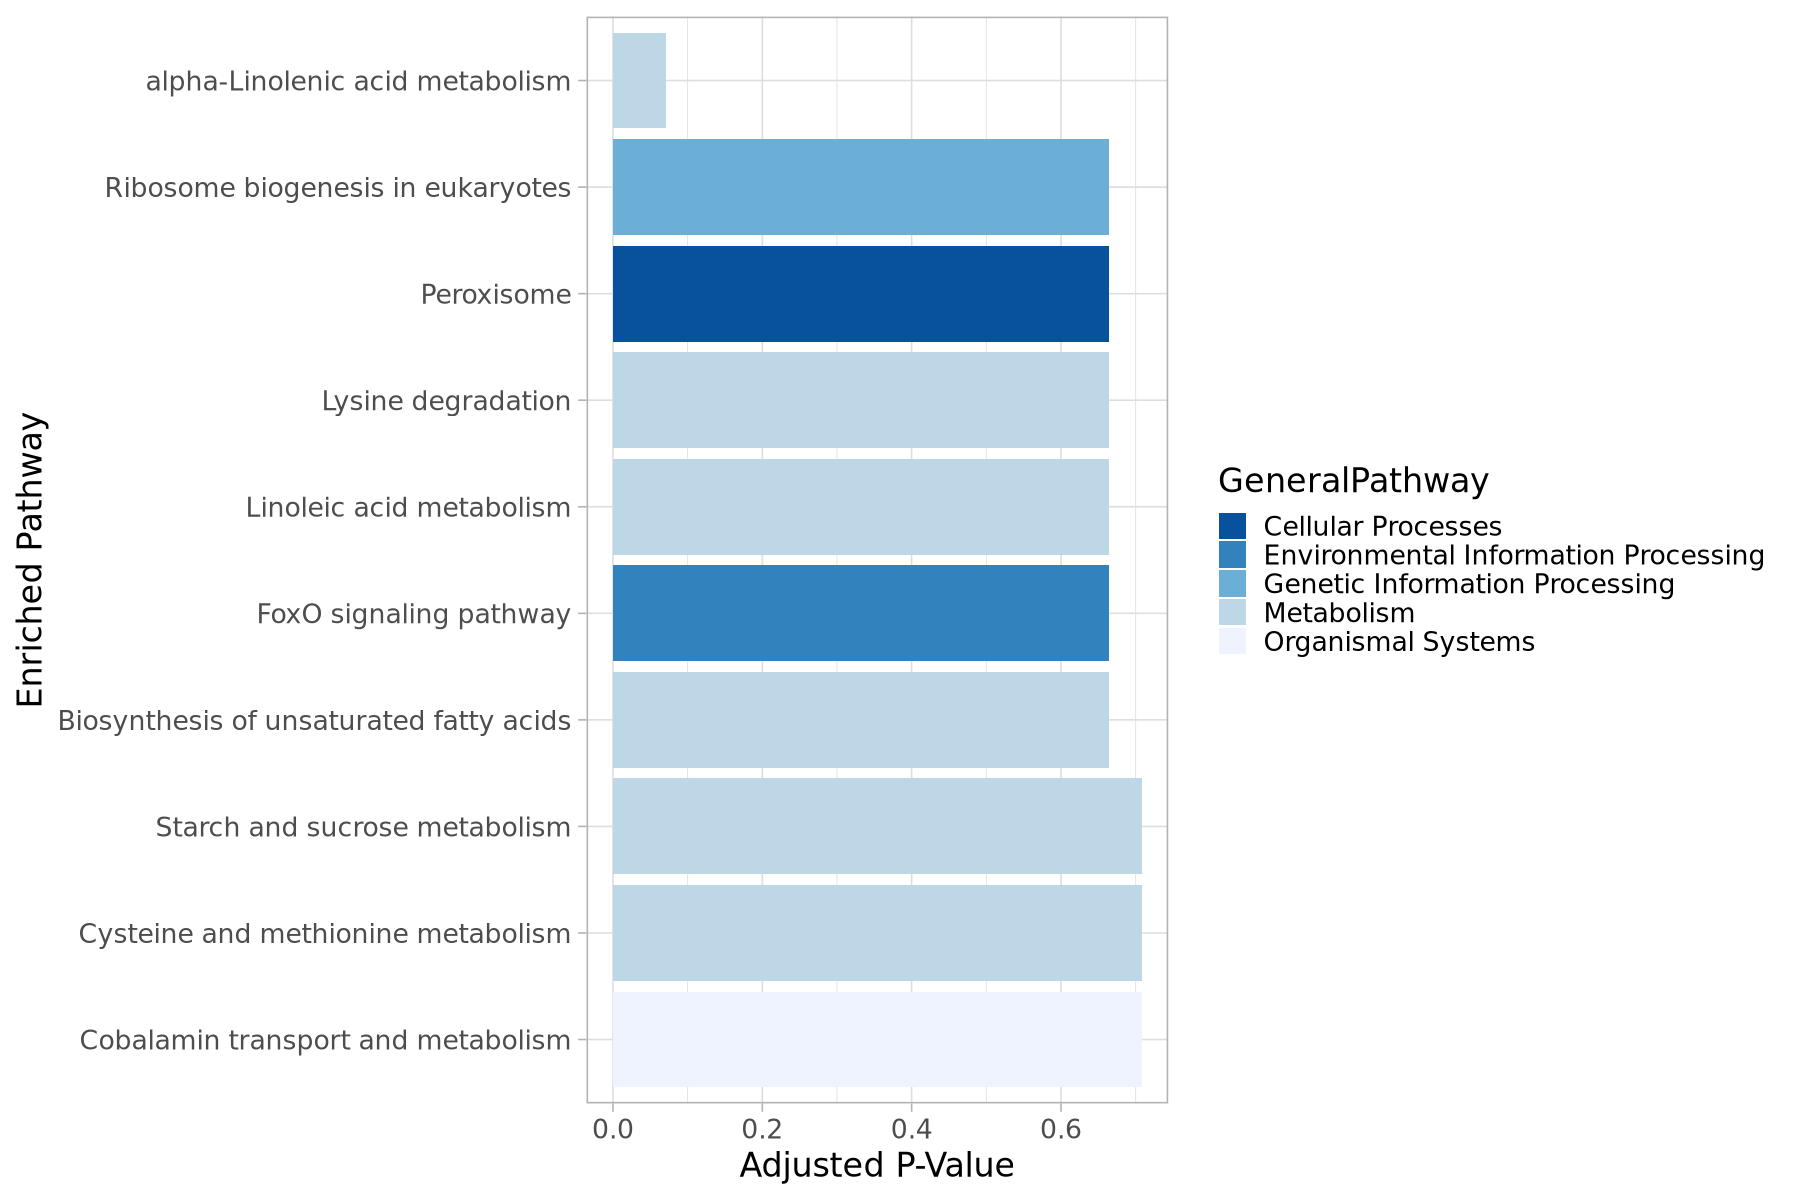

In [128]:
options(repr.plot.width=15, repr.plot.height=10)

CC_top10 <- head(CC_df[order(CC_df$p.adjust), ], 10)
CC_top10

ggplot(CC_top10, aes(x = reorder(Description, -p.adjust), y = p.adjust, fill = GeneralPathway)) +
  geom_bar(stat = "identity") +
  coord_flip() +
geom_vline(xintercept = 0.05,
           col = "gray",
           linetype = 'dashed', 
          linewidth = 10) + # significance threshold line
scale_fill_brewer(palette = 'Blues', direction=-1) +
  labs(y = "Adjusted P-Value",
       x = "Enriched Pathway") +
  theme_light(base_size=20)

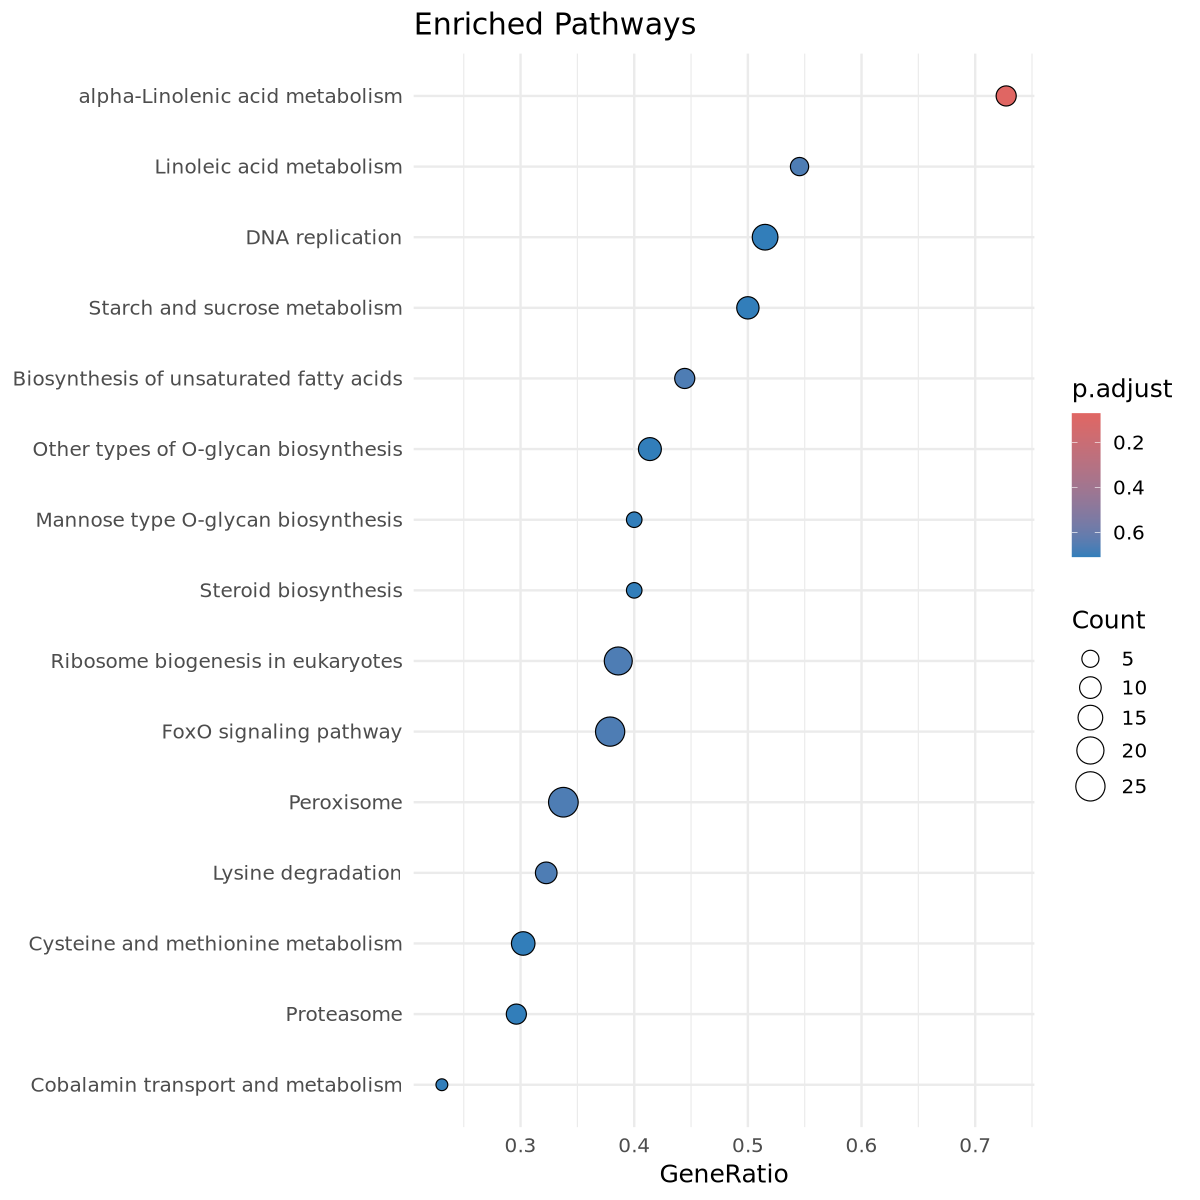

In [138]:
options(repr.plot.width=10, repr.plot.height=10)

CC_kk2@result$Description <- gsub(CC_kk2@result$Description, pattern="\\s-\\sCra.+$", replacement="")

# Create the dot plot
dotplot(CC_kk2, 
        showCategory = 15,  # Number of categories to show
        font.size = 9,      # Font size for labels
        label_format = 100,  # Format for labels (length limit)
        title = "Enriched Pathways") +
  theme_minimal(base_size = 15)  # Optional: change theme for better appearance
